# 数据预处理与分析
## 任务1.1 
根据附件1的数据，提取每台售货机对应的销售数据，保存在CSV文件中，分别命名为“task1-1A.csv”......“tasl1-1E.csv” 

In [1]:
import pandas as pd  #导入pandas库
f = open('附件1.csv')
data = pd.read_csv(f)  #读取附件1
f.close()
data.head() #查看附件1数据

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [2]:
task_A = data[data.地点.values=='A']
task_A.to_csv('task1-1A.csv')        #将A售货机的数据保存为task1-1A

task_B = data[data.地点.values=='B']
task_B.to_csv('task1-1B.csv')

task_C = data[data.地点.values=='C']
task_C.to_csv('task1-1C.csv')

task_D = data[data.地点.values=='D']
task_D.to_csv('task1-1D.csv')

task_E = data[data.地点.values=='E']
task_E.to_csv('task1-1E.csv')

## 任务1.2
计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额的订单总量，以表格形式体现在报告中

In [3]:
May_data = data[data.支付时间.str.startswith('2017/5')] #选取2017年5月份的销售数据
May_data.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7045,DD2017081674930598278687133911,E43A6E078A04228,10.0,10.0,85g统一老坛酸菜牛肉面,2017/5/1 0:02,C,已出货未退款,已提现
7046,DD2017071918075974A794CB8C5B1,E43A6E078A04134,4.0,4.0,阿萨姆奶茶,2017/5/1 0:03,B,已出货未退款,已提现
7047,DD201708167493963381910837362,E43A6E078A06874,3.0,3.0,维他奶,2017/5/1 0:03,E,已出货未退款,已提现
7048,DD2017081674930598730566838537,E43A6E078A04134,20.0,20.0,145ml旺仔牛奶盒装,2017/5/1 0:30,B,已出货未退款,已提现
7049,DD2017081674930598972927113082,E43A6E078A04134,2.5,2.5,30g无穷农场盐_鸡蛋,2017/5/1 0:52,B,已出货未退款,已提现


* 计算每台售货机2017年5月份的交易额

In [4]:
locations = list('ABCDE')
for location in locations:
    print('{}售货机5月份的交易额为：{}'.format(location,May_data[May_data.地点==location].实际金额.sum()))

A售货机5月份的交易额为：3385.1
B售货机5月份的交易额为：3681.2
C售货机5月份的交易额为：3729.4
D售货机5月份的交易额为：2392.1
E售货机5月份的交易额为：5699.0


* 计算每台售货机2017年5月份的订单量

In [5]:
for location in locations:
    print('{}售货机5月份的订单量为：{}'.format(location,May_data[May_data.地点==location].shape[0]))

A售货机5月份的订单量为：756
B售货机5月份的订单量为：869
C售货机5月份的订单量为：789
D售货机5月份的订单量为：564
E售货机5月份的订单量为：1292


* 2017年5月份所有售货机交易总额的订单总量

In [6]:
print('2017年5月份所有售货机的交易总额为：{:.2f}\n2017年5月所有售货机的订单总量为：{}'.format(May_data.实际金额.sum(),May_data.shape[0]))

2017年5月份所有售货机的交易总额为：18886.80
2017年5月所有售货机的订单总量为：4270


## 任务1.3
计算每台售货机每月的每单平均交易额与日均订单量，以表格形式体现在报告中

In [16]:
data_file = ['task1-1A.csv','task1-1B.csv','task1-1C.csv','task1-1D.csv','task1-1E.csv']
month = ['2017/1/','2017/2','2017/3','2017/4','2017/5','2017/6',\
         '2017/7','2017/8','2017/9','2017/10','2017/11','2017/12']
days = [31,29,31,30,31,30,31,31,30,31,30,31]
dd = 0
cc = {}
ff = {}
for file in data_file:
    gg = file[-5]
    cc[gg] = []
    ff[gg] = []
    task = pd.read_csv(file)
    for mon in month:
        mon_data = task[task.支付时间.str.startswith(mon)]
        average_money = mon_data['实际金额'].sum() / mon_data.shape[0]
        cc[gg].append(round(average_money,2))
        print('{}售货机{}的每单平均交易额为：{:.2f}'.format(gg,mon,average_money))
        average_number = mon_data.shape[0] / days[dd]
        ff[gg].append(round(average_number,2))
        dd +=1
        print('{}售货机{}的日均订单量为：{:.2f}单\n'.format(gg,mon,average_number))
    dd = 0
    print('\n\n') 
print('各售货机平均交易额为：\n',cc)
print('各售货机平均订单量为：\n',ff)
        
        

A售货机2017/1/的每单平均交易额为：4.51
A售货机2017/1/的日均订单量为：10.81单

A售货机2017/2的每单平均交易额为：3.86
A售货机2017/2的日均订单量为：3.93单

A售货机2017/3的每单平均交易额为：3.59
A售货机2017/3的日均订单量为：8.23单

A售货机2017/4的每单平均交易额为：4.04
A售货机2017/4的日均订单量为：14.90单

A售货机2017/5的每单平均交易额为：4.48
A售货机2017/5的日均订单量为：24.39单

A售货机2017/6的每单平均交易额为：4.05
A售货机2017/6的日均订单量为：55.63单

A售货机2017/7的每单平均交易额为：4.10
A售货机2017/7的日均订单量为：15.35单

A售货机2017/8的每单平均交易额为：3.36
A售货机2017/8的日均订单量为：21.48单

A售货机2017/9的每单平均交易额为：4.31
A售货机2017/9的日均订单量为：34.67单

A售货机2017/10的每单平均交易额为：4.02
A售货机2017/10的日均订单量为：50.48单

A售货机2017/11的每单平均交易额为：4.47
A售货机2017/11的日均订单量为：38.67单

A售货机2017/12的每单平均交易额为：3.79
A售货机2017/12的日均订单量为：64.61单




B售货机2017/1/的每单平均交易额为：3.75
B售货机2017/1/的日均订单量为：11.81单

B售货机2017/2的每单平均交易额为：3.26
B售货机2017/2的日均订单量为：6.38单

B售货机2017/3的每单平均交易额为：3.61
B售货机2017/3的日均订单量为：8.55单

B售货机2017/4的每单平均交易额为：4.08
B售货机2017/4的日均订单量为：20.10单

B售货机2017/5的每单平均交易额为：4.24
B售货机2017/5的日均订单量为：28.03单

B售货机2017/6的每单平均交易额为：4.07
B售货机2017/6的日均订单量为：61.87单

B售货机2017/7的每单平均交易额为：4.40
B售货机2017/7的日均订单量为：11.13单

B售货机2017/8的每单平均交易额为：3.

In [17]:
import pandas as pd
CC = pd.DataFrame(cc,index=range(1,13,1))
FF = pd.DataFrame(ff,index=range(1,13,1))

每台售货机每月平均每单交易额

In [21]:
print('每台售货机每月平均每单交易额')
CC.T

每台售货机每月平均每单交易额


,1,2,3,4,5,6,7,8,9,10,11,12
A,4.51,3.86,3.59,4.04,4.48,4.05,4.10,3.36,4.31,4.02,4.47,3.79
B,3.75,3.26,3.61,4.08,4.24,4.07,4.40,3.58,4.13,4.11,4.27,3.67
C,4.33,3.83,3.77,4.40,4.73,4.50,3.99,3.91,4.43,4.27,4.35,3.94
D,3.69,3.09,4.31,3.79,4.24,4.03,4.23,3.32,3.90,3.88,3.86,3.57
E,4.68,3.64,4.31,4.16,4.41,3.82,3.92,3.80,4.13,3.68,4.28,4.17


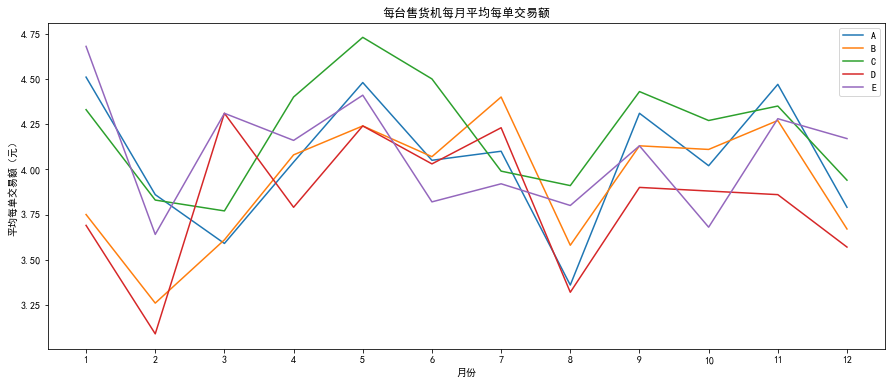

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,6))
plt.plot(range(1,13,1),CC.A,
        range(1,13,1),CC.B,
        range(1,13,1),CC.C,
        range(1,13,1),CC.D,
        range(1,13,1),CC.E)
plt.legend(list('ABCDE'))
plt.title('每台售货机每月平均每单交易额')
plt.xlabel('月份')
plt.ylabel('平均每单交易额（元）')
plt.xticks(range(1,13,1))
plt.savefig('每台售货机每月平均每单交易额.png')
plt.show()

In [33]:
print('平均每台售货机每月每天订单量')
FF.T

平均每台售货机每月每天订单量


,1,2,3,4,5,6,7,8,9,10,11,12
A,10.81,3.93,8.23,14.90,24.39,55.63,15.35,21.48,34.67,50.48,38.67,64.61
B,11.81,6.38,8.55,20.10,28.03,61.87,11.13,31.65,58.17,65.35,67.70,71.29
C,12.23,7.17,8.48,24.47,25.45,62.73,24.65,40.61,55.93,71.48,64.77,76.74
D,8.35,4.86,6.19,14.77,18.19,34.67,10.23,23.06,32.77,38.26,40.33,53.65
E,11.42,8.90,11.29,29.83,41.68,86.43,26.23,57.00,137.80,89.58,167.33,104.90


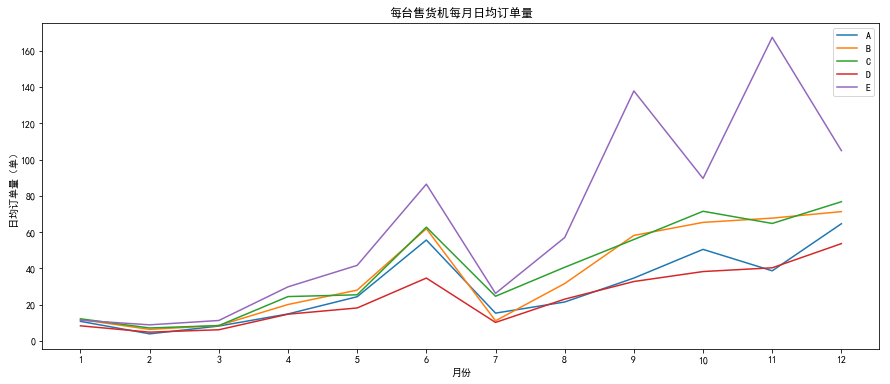

In [34]:
plt.figure(figsize=(15,6))
plt.plot(range(1,13,1),FF.A,
        range(1,13,1),FF.B,
        range(1,13,1),FF.C,
        range(1,13,1),FF.D,
        range(1,13,1),FF.E)
plt.legend(list('ABCDE'))
plt.title('每台售货机每月日均订单量')
plt.xlabel('月份')
plt.ylabel('日均订单量（单）')
plt.xticks(range(1,13,1))
plt.savefig('每台售货机日均订单量.png')
plt.show()

# 数据分析与可视化
## 任务2.1
* 给2017年6月份销量前五的商品画柱状图

In [35]:
June_data = data[data.支付时间.str.startswith('2017/6')]

In [37]:
June_data.shape

(9040, 9)

In [38]:
June_data['商品数量'] = 1
June_top5 = June_data[['商品','商品数量']].groupby('商品').sum().sort_values('商品数量',ascending=False).head()
June_top5

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,商品数量
商品,
怡宝纯净水,657
40g双汇玉米热狗肠,240
东鹏特饮,238
脉动,235
250ml维他柠檬茶,225


In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

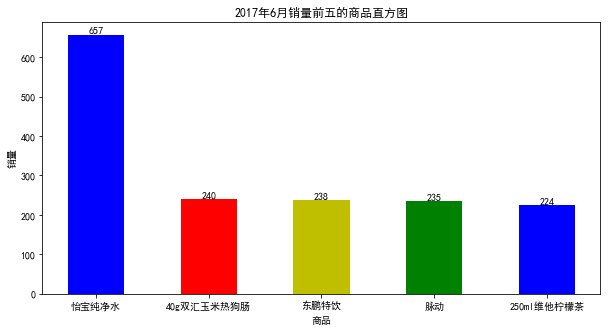

In [40]:
foods_name = list(June_top5.index)
plt.figure(figsize=(10,5))
num_list = [657,240,238,235,224]
reacts = plt.bar(range(5),num_list,color='bryg',width=0.5)
plt.xlabel('商品')
plt.ylabel('销量')
plt.title('2017年6月销量前五的商品直方图')
plt.xticks(range(5),foods_name)
for i in range(len(num_list)):
    plt.text(i,num_list[i],num_list[i],va='bottom', ha='center')
plt.savefig('2017年6月销量前五的商品直方图.png')

## 任务2.2
* 绘制每台售货机每月总交易额折线图及交易额月环比增长率柱状图

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

f = open('附件1.csv')
data = pd.read_csv(f)
f.close()
data.head(3)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现


In [42]:
dates = pd.date_range('2017/1',periods=12,freq='M')
date_list = ['2017/1/','2017/2','2017/3','2017/4','2017/5','2017/6',\
         '2017/7','2017/8','2017/9','2017/10','2017/11','2017/12']
aaa = {}
for place in list('ABCDE'):
    pla = []
    for mon in date_list:
        turnover = data.loc[data.支付时间.str.startswith(mon)].loc[data.地点==place]['实际金额'].sum()
        pla.append(turnover)
        print('{}售货机{}的交易额为{:.2f}'.format(place,mon,turnover))
    print('\n\n')
    aaa[place] = pla

A售货机2017/1/的交易额为1509.70
A售货机2017/2的交易额为440.50
A售货机2017/3的交易额为914.30
A售货机2017/4的交易额为1804.50
A售货机2017/5的交易额为3385.10
A售货机2017/6的交易额为6755.10
A售货机2017/7的交易额为1950.50
A售货机2017/8的交易额为2236.90
A售货机2017/9的交易额为4479.50
A售货机2017/10的交易额为6292.40
A售货机2017/11的交易额为5187.00
A售货机2017/12的交易额为7587.10



B售货机2017/1/的交易额为1373.60
B售货机2017/2的交易额为602.30
B售货机2017/3的交易额为957.90
B售货机2017/4的交易额为2457.40
B售货机2017/5的交易额为3681.20
B售货机2017/6的交易额为7550.30
B售货机2017/7的交易额为1518.60
B售货机2017/8的交易额为3516.10
B售货机2017/9的交易额为7207.30
B售货机2017/10的交易额为8331.60
B售货机2017/11的交易额为8669.90
B售货机2017/12的交易额为8104.10



C售货机2017/1/的交易额为1640.50
C售货机2017/2的交易额为796.00
C售货机2017/3的交易额为991.50
C售货机2017/4的交易额为3232.30
C售货机2017/5的交易额为3729.40
C售货机2017/6的交易额为8472.20
C售货机2017/7的交易额为3047.10
C售货机2017/8的交易额为4927.20
C售货机2017/9的交易额为7429.00
C售货机2017/10的交易额为9469.70
C售货机2017/11的交易额为8456.70
C售货机2017/12的交易额为9380.50



D售货机2017/1/的交易额为956.40
D售货机2017/2的交易额为435.50
D售货机2017/3的交易额为826.70
D售货机2017/4的交易额为1679.10
D售货机2017/5的交易额为2392.10
D售货机2017/6的交易额为4187.00
D售货机2017/7的交易额为1340.8

In [43]:
values = pd.DataFrame(aaa,index=dates)
pd.DataFrame(aaa,index=dates)  #每台售货机每月总交易额数据

,A,B,C,D,E
2017-01-31,1509.7,1373.6,1640.5,956.4,1656.8
2017-02-28,440.5,602.3,796.0,435.5,938.7
2017-03-31,914.3,957.9,991.5,826.7,1507.0
2017-04-30,1804.5,2457.4,3232.3,1679.1,3723.1
2017-05-31,3385.1,3681.2,3729.4,2392.1,5699.0
2017-06-30,6755.1,7550.3,8472.2,4187.0,9899.7
2017-07-31,1950.5,1518.6,3047.1,1340.8,3186.4
2017-08-31,2236.9,3516.1,4927.2,2371.3,6722.5
2017-09-30,4479.5,7207.3,7429.0,3833.1,17054.3
2017-10-31,6292.4,8331.6,9469.7,4606.7,10208.6


绘制每台售货机每月总交易额折线图

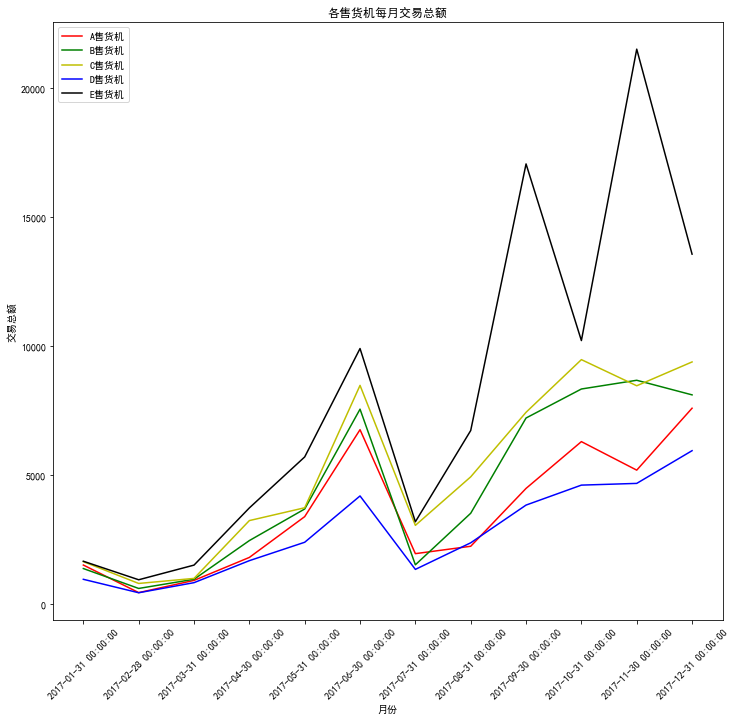

In [45]:
p1 = plt.figure(figsize=(12,11))
plt.plot(range(12),values['A'],'r-',
        range(12),values['B'],'g-',
        range(12),values['C'],'y-',
        range(12),values['D'],'b-',
        range(12),values['E'],'k-')
plt.legend(['A售货机','B售货机','C售货机','D售货机','E售货机'])
plt.xlabel('月份')
plt.ylabel('交易总额')
plt.title('各售货机每月交易总额')
plt.xticks(range(12),dates,rotation=45)
plt.savefig('各售货机每月交易总额.png')
plt.show()

绘制每台售货机交易额月环比增长率柱状图

In [46]:
bbb = {}
for i in range(5):
    k = []
    for j in range(11):
        k.append(((values.iloc[j+1,i]-values.iloc[j,i]) / values.iloc[j,i])*100)
    bbb[i] = k
groth_rate = pd.DataFrame(bbb)
groth_rate.columns = list('ABCDE')
groth_rate.index = pd.date_range('2017/2',periods=11,freq='M')
print('各个售货机的月环比增长率如下，单位是%')
groth_rate = groth_rate.apply(lambda x:round(x,2))
groth_rate

各个售货机的月环比增长率如下，单位是%


,A,B,C,D,E
2017-02-28,-70.82,-56.15,-51.48,-54.46,-43.34
2017-03-31,107.56,59.04,24.56,89.83,60.54
2017-04-30,97.36,156.54,226.00,103.11,147.05
2017-05-31,87.59,49.80,15.38,42.46,53.07
2017-06-30,99.55,105.10,127.17,75.03,73.71
2017-07-31,-71.13,-79.89,-64.03,-67.98,-67.81
2017-08-31,14.68,131.54,61.70,76.86,110.97
2017-09-30,100.25,104.98,50.78,61.65,153.69
2017-10-31,40.47,15.60,27.47,20.18,-40.14
2017-11-30,-17.57,4.06,-10.70,1.45,110.62


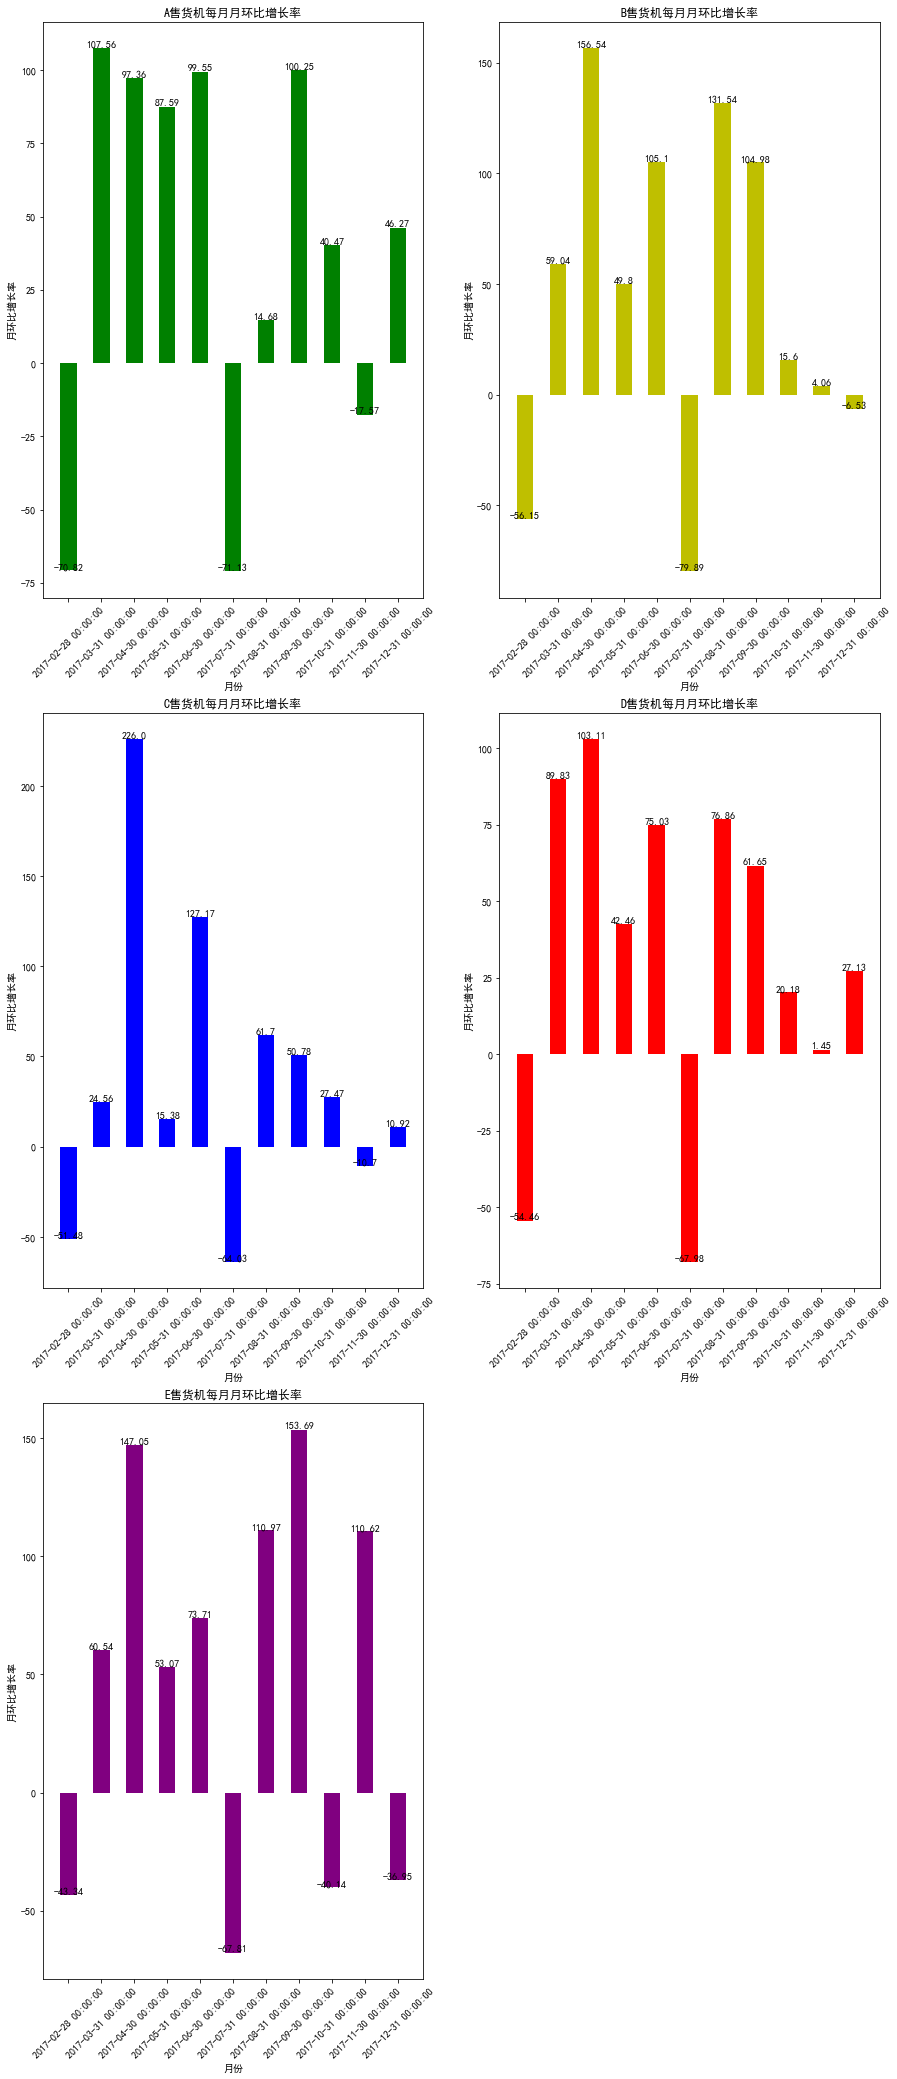

In [68]:
p = plt.figure(figsize=(15,36))
values = groth_rate.values
# A售货机
ax1 = p.add_subplot(3,2,1)
plt.bar(range(11),values[:,0],width=0.5,color='g')
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('A售货机每月月环比增长率')
plt.xticks(range(11),pd.date_range('2017/2',periods=11,freq='M'),rotation=45)
for i in range(11):
    plt.text(i, values[i,0], values[i,0], va='bottom', ha='center')

# B售货机
ax1 = p.add_subplot(3,2,2)
plt.bar(range(11),values[:,1],width=0.5,color='y')
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('B售货机每月月环比增长率')
plt.xticks(range(11),pd.date_range('2017/2',periods=11,freq='M'),rotation=45)
for i in range(11):
    plt.text(i, values[i,1], values[i,1], va='bottom', ha='center')

# C售货机
ax1 = p.add_subplot(3,2,3)
plt.bar(range(11),values[:,2],width=0.5,color='b')
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('C售货机每月月环比增长率')
plt.xticks(range(11),pd.date_range('2017/2',periods=11,freq='M'),rotation=45)
for i in range(11):
    plt.text(i, values[i,2], values[i,2], va='bottom', ha='center')

# D售货机
ax1 = p.add_subplot(3,2,4)
plt.bar(range(11),values[:,3],width=0.5,color='r')
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('D售货机每月月环比增长率')
plt.xticks(range(11),pd.date_range('2017/2',periods=11,freq='M'),rotation=45)
for i in range(11):
    plt.text(i, values[i,3], values[i,3], va='bottom', ha='center')

# E售货机
ax1 = p.add_subplot(3,2,5)
plt.bar(range(11),values[:,4],width=0.5,color='purple')
plt.xlabel('月份')
plt.ylabel('月环比增长率')
plt.title('E售货机每月月环比增长率')
plt.xticks(range(11),pd.date_range('2017/2',periods=11,freq='M'),rotation=45)
for i in range(11):
    plt.text(i, values[i,4], values[i,4], va='bottom', ha='center')

# 保存图片
plt.savefig('各售货机月环比增长率直方图.png')
plt.show()

## 任务2.3
* 绘制每台售货机毛利润占总毛利润比例的饼图（假设饮料类毛利率为25%，非饮料类为20%）

In [69]:
import pandas as pd

data2 = pd.read_csv('附件2.csv',engine = 'python')
data2.head(3)

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点
2,10g卫龙亲嘴烧香辣味,非饮料,肉干/豆制品/蛋


In [70]:
data1 = pd.read_csv('附件1.csv',engine='python')
data1.head(3)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现


In [78]:
drinks = list(data2[data2.大类 =='饮料'].商品) # 饮料商品名称
Non_beverage = list(data2[data2.大类 =='非饮料'].商品) #非饮料商品名称

In [97]:
data1['大类'] = '未知种类'   # 给附件1的数据新增加一个列“大类”
data1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,大类
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现,未知种类
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现,未知种类
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现,未知种类
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现,未知种类
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现,未知种类


In [98]:
# 将饮料商品的大类标记为饮料
for x in drinks:
    data1.loc[data1.商品 == x] = data1.loc[data1.商品 == x].replace('未知种类','饮料')
# 将非饮料商品的大类标记为非饮料
for y in Non_beverage:
    data1.loc[data1.商品 == y] = data1.loc[data1.商品 == y].replace('未知种类','非饮料')

In [165]:
profit = data1[['实际金额','地点','大类']].groupby(by=['地点','大类']).sum()

profit  # 各个售货机不同类商品的销售额

实际金额
地点 大类          
A  非饮料  18561.3
   饮料   23981.3
B  非饮料  18975.1
   饮料   34995.2
C  非饮料  22017.2
   饮料   39554.9
D  非饮料  12149.7
   饮料   21093.6
E  非饮料  31452.4
   饮料   64203.0

In [166]:
# 各个售货机不同类商品的利润
for i in range(0,10,2):
    profit.iloc[i,0] =  profit.iloc[i,0] * 0.2
for j in range(1,10,2):
    profit.iloc[j,0] = profit.iloc[j,0] * 0.25
profit.rename(columns={'实际金额':'利润'})   

利润
地点 大类            
A  非饮料   3712.260
   饮料    5995.325
B  非饮料   3795.020
   饮料    8748.800
C  非饮料   4403.440
   饮料    9888.725
D  非饮料   2429.940
   饮料    5273.400
E  非饮料   6290.480
   饮料   16050.750

绘制饼图

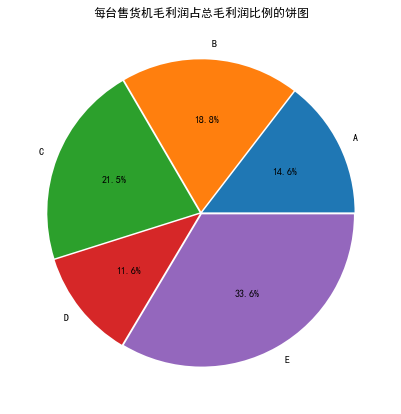

In [171]:
plt.figure(figsize=(7,7))
label = list('ABCDE')
explode = [0.01]*5
profit_list = [profit.iloc[0,0]+profit.iloc[1,0],
              profit.iloc[2,0]+profit.iloc[3,0],
              profit.iloc[4,0]+profit.iloc[5,0],
              profit.iloc[6,0]+profit.iloc[7,0],
              profit.iloc[8,0]+profit.iloc[9,0]]
plt.pie(profit_list,explode=explode,labels=label,autopct='%1.1f%%')
plt.title('每台售货机毛利润占总毛利润比例的饼图')
plt.savefig('每台售货机毛利润占总毛利润比例的饼图.png')
plt.show()

## 任务2.4
* 绘制每月交易额均值气泡图，横轴为时间，纵轴为商品二级类目

In [1]:
import pandas as pd
data1 = pd.read_csv('附件1.csv',engine='python')
data2 = pd.read_csv('附件2.csv',engine='python')

In [2]:
class_two = list(set(data2.二级类))
class_two

['其他',
 '方便速食',
 '碳酸饮料',
 '茶饮料',
 '蜜饯/果干',
 '香烟',
 '纸巾',
 '植物蛋白',
 '果冻/龟苓膏',
 '糖果/巧克力',
 '海味零食',
 '咖啡',
 '肉干/豆制品/蛋',
 '饼干糕点',
 '水',
 '功能饮料',
 '果蔬饮料',
 '膨化食品',
 '乳制品',
 '坚果炒货']

In [3]:
data1['二级类'] = '未知食品'
data1.head(2)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现,未知食品
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现,未知食品


In [4]:
data2.head(2)

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点


In [5]:
# 将商品按二级类分好
for class2 in class_two:
    for x in list(data2.loc[data2.二级类 == class2].商品.values):
        data1.loc[data1.商品 == x] = data1.loc[data1.商品 == x].replace('未知食品',class2)

In [6]:
data1.head(3)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现,饼干糕点
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现,肉干/豆制品/蛋
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现,方便速食


In [7]:
data1.loc[data1.支付时间.str.startswith('2017/2/29')]  # 不合理的时间

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类
70679,DD201708167493241554692026752,E43A6E078A04228,4.0,4.0,55g奥利奥原味芝士饼干,2017/2/29 3:44:00 PM,C,已出货未退款,已提现,饼干糕点


In [8]:
data1.drop([70679],inplace=True) # 删除不合理的数据

In [9]:
data1.loc[data1.支付时间.str.startswith('2017/2/29')]  # 不合理的时间

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类


In [10]:
data1.支付时间 = pd.to_datetime(data1.支付时间)  # 将“支付时间”这一列的类型转换成时间类型

In [11]:
data1['月份'] = '某月' # 新增加一列"月份"
data1.head(2)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类,月份
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-01 00:53:00,D,已出货未退款,已提现,饼干糕点,某月
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,肉干/豆制品/蛋,某月


In [12]:
# 给每个订单贴上月份

for i in range(1,13):
    data1.loc[data1.支付时间.dt.month ==i,'月份'] = i

In [13]:
data1.head(3)

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,二级类,月份
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017-01-01 00:53:00,D,已出货未退款,已提现,饼干糕点,1
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 01:33:00,A,已出货未退款,已提现,肉干/豆制品/蛋,1
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017-01-01 08:45:00,E,已出货未退款,已提现,方便速食,1


In [45]:
import numpy as np
data5 = pd.pivot_table(data1[['月份','实际金额','二级类']],index=['二级类','月份'],aggfunc=np.sum)

In [50]:
data5

实际金额
二级类   月份        
乳制品   1   1148.0
      2    343.0
      3    594.8
      4   1857.3
      5   2651.6
      6   5405.5
      7   1574.4
      8   2179.4
      9   5892.6
      10  5554.3
      11  7278.7
      12  5406.7
其他    3      0.1
      4      0.3
      6      3.4
      7     26.0
      8     32.0
      9    150.4
      10    62.1
      11   215.7
      12    21.7
功能饮料  1    718.5
      2    663.5
      3    955.0
      4   1558.3
      5   1658.3
      6   3653.7
      7   1181.0
      8   3672.1
      9   4983.8
...          ...
蜜饯/果干 7    394.4
      8    920.3
      9   1223.2
      10  1333.4
      11  1654.4
      12  2066.7
饼干糕点  1    856.0
      2    108.5
      3    254.0
      4   1287.5
      5   2453.0
      6   3845.5
      7    995.0
      8    888.5
      9   3558.0
      10  3174.0
      11  4001.0
      12  2928.5
香烟    1    165.0
      2     73.0
      3     90.0
      4     75.0
      5     23.0
      6    228.0
      7     50.0
      8    281.0
      9    485.0
      10   236.0
      11   665.0
      12   910.0

[232 rows x 1 columns]

In [73]:
values = data5.unstack().T
values

二级类         乳制品     其他    功能饮料      咖啡   坚果炒货    方便速食  果冻/龟苓膏    果蔬饮料    植物蛋白  \
     月份                                                                         
实际金额 1   1148.0    NaN   718.5   169.5   50.0   457.0     5.0   217.0   263.2   
     2    343.0    NaN   663.5    23.5    NaN   122.9     NaN   180.5    63.6   
     3    594.8    0.1   955.0    33.5   21.0   345.6     5.0   140.0   197.0   
     4   1857.3    0.3  1558.3   296.5   30.8   824.5    27.0   393.0   438.6   
     5   2651.6    NaN  1658.3   610.5   79.8  2022.5    32.0   553.5   608.6   
     6   5405.5    3.4  3653.7   515.0  146.8  3009.5    17.0   891.0  1497.0   
     7   1574.4   26.0  1181.0   230.0   61.5   890.7    22.0   296.5   381.4   
     8   2179.4   32.0  3672.1   154.0    NaN   773.2     NaN   849.0   270.5   
     9   5892.6  150.4  4983.8  1064.0  108.5  2482.1   108.0  1583.0  1196.7   
     10  5554.3   62.1  4403.9   675.0   79.6  2470.5    30.0  1292.5  1288.2   
     11  7278.7  215.7  6322.5  1253.0  164.5  3547.3    66.0  1953.5  1216.0   
     12  5406.7   21.7  7025.8   898.0   93.6  2720.5    55.0  1462.5  1348.6   

二级类           水   海味零食    碳酸饮料  糖果/巧克力     纸巾  肉干/豆制品/蛋    膨化食品     茶饮料  \
     月份                                                                   
实际金额 1    305.2   60.9   383.7    53.3   19.2     802.5   325.2   898.0   
     2    208.2   14.5   328.5     4.0    NaN     219.0    11.8   684.5   
     3    216.7   42.5   425.8    23.6   11.6     477.7   145.0  1013.5   
     4    570.3  119.4   801.6    77.9   49.0    1418.0   601.6  2040.5   
     5    385.9  222.5   793.4   132.0   57.6    2537.5  1591.1  1938.0   
     6   1795.1  371.8  2088.4   240.7   84.6    4378.7  2799.7  4905.0   
     7    396.5   77.8   648.5   108.8   24.0    1372.9   535.5  1776.5   
     8   1571.4  108.4  1966.2    39.6   40.4    1397.5   327.5  4303.0   
     9   2229.4  278.0  3078.7   172.3   90.4    3574.8  1594.3  6150.0   
     10  2068.0  369.7  2495.9   266.2   79.2    4569.2  1948.8  6512.5   
     11  2107.0  475.3  3605.9   266.7  131.6    3997.9  1850.8  7716.0   
     12  2059.8  380.3  3554.6   118.4   86.6    3887.6  1742.5  7803.0   

二级类       蜜饯/果干    饼干糕点     香烟  
     月份                         
实际金额 1    239.8   856.0  165.0  
     2    160.0   108.5   73.0  
     3    205.0   254.0   90.0  
     4    429.3  1287.5   75.0  
     5    536.0  2453.0   23.0  
     6    987.9  3845.5  228.0  
     7    394.4   995.0   50.0  
     8    920.3   888.5  281.0  
     9   1223.2  3558.0  485.0  
     10  1333.4  3174.0  236.0  
     11  1654.4  4001.0  665.0  
     12  2066.7  2928.5  910.0

In [102]:
a = values.reset_index()
month = range(1,13,1)
a.drop(labels = 'level_0', axis = 1, inplace = True)
a.drop(labels = '月份', axis = 1, inplace = True)
a.index = month
a

二级类,乳制品,其他,功能饮料,咖啡,坚果炒货,方便速食,果冻/龟苓膏,果蔬饮料,植物蛋白,水,海味零食,碳酸饮料,糖果/巧克力,纸巾,肉干/豆制品/蛋,膨化食品,茶饮料,蜜饯/果干,饼干糕点,香烟
1,1148.0,NaN,718.5,169.5,50.0,457.0,5.0,217.0,263.2,305.2,60.9,383.7,53.3,19.2,802.5,325.2,898.0,239.8,856.0,165.0
2,343.0,NaN,663.5,23.5,NaN,122.9,NaN,180.5,63.6,208.2,14.5,328.5,4.0,NaN,219.0,11.8,684.5,160.0,108.5,73.0
3,594.8,0.1,955.0,33.5,21.0,345.6,5.0,140.0,197.0,216.7,42.5,425.8,23.6,11.6,477.7,145.0,1013.5,205.0,254.0,90.0
4,1857.3,0.3,1558.3,296.5,30.8,824.5,27.0,393.0,438.6,570.3,119.4,801.6,77.9,49.0,1418.0,601.6,2040.5,429.3,1287.5,75.0
5,2651.6,NaN,1658.3,610.5,79.8,2022.5,32.0,553.5,608.6,385.9,222.5,793.4,132.0,57.6,2537.5,1591.1,1938.0,536.0,2453.0,23.0
6,5405.5,3.4,3653.7,515.0,146.8,3009.5,17.0,891.0,1497.0,1795.1,371.8,2088.4,240.7,84.6,4378.7,2799.7,4905.0,987.9,3845.5,228.0
7,1574.4,26.0,1181.0,230.0,61.5,890.7,22.0,296.5,381.4,396.5,77.8,648.5,108.8,24.0,1372.9,535.5,1776.5,394.4,995.0,50.0
8,2179.4,32.0,3672.1,154.0,NaN,773.2,NaN,849.0,270.5,1571.4,108.4,1966.2,39.6,40.4,1397.5,327.5,4303.0,920.3,888.5,281.0
9,5892.6,150.4,4983.8,1064.0,108.5,2482.1,108.0,1583.0,1196.7,2229.4,278.0,3078.7,172.3,90.4,3574.8,1594.3,6150.0,1223.2,3558.0,485.0
10,5554.3,62.1,4403.9,675.0,79.6,2470.5,30.0,1292.5,1288.2,2068.0,369.7,2495.9,266.2,79.2,4569.2,1948.8,6512.5,1333.4,3174.0,236.0


In [103]:
# 算每月交易额均值
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(12):
    a.iloc[i] = a.iloc[i] / days[i]   

In [104]:
a

二级类,乳制品,其他,功能饮料,咖啡,坚果炒货,方便速食,果冻/龟苓膏,果蔬饮料,植物蛋白,水,海味零食,碳酸饮料,糖果/巧克力,纸巾,肉干/豆制品/蛋,膨化食品,茶饮料,蜜饯/果干,饼干糕点,香烟
1,37.032258,NaN,23.177419,5.467742,1.612903,14.741935,0.161290,7.000000,8.490323,9.845161,1.964516,12.377419,1.719355,0.619355,25.887097,10.490323,28.967742,7.735484,27.612903,5.322581
2,12.250000,NaN,23.696429,0.839286,NaN,4.389286,NaN,6.446429,2.271429,7.435714,0.517857,11.732143,0.142857,NaN,7.821429,0.421429,24.446429,5.714286,3.875000,2.607143
3,19.187097,0.003226,30.806452,1.080645,0.677419,11.148387,0.161290,4.516129,6.354839,6.990323,1.370968,13.735484,0.761290,0.374194,15.409677,4.677419,32.693548,6.612903,8.193548,2.903226
4,61.910000,0.010000,51.943333,9.883333,1.026667,27.483333,0.900000,13.100000,14.620000,19.010000,3.980000,26.720000,2.596667,1.633333,47.266667,20.053333,68.016667,14.310000,42.916667,2.500000
5,85.535484,NaN,53.493548,19.693548,2.574194,65.241935,1.032258,17.854839,19.632258,12.448387,7.177419,25.593548,4.258065,1.858065,81.854839,51.325806,62.516129,17.290323,79.129032,0.741935
6,180.183333,0.113333,121.790000,17.166667,4.893333,100.316667,0.566667,29.700000,49.900000,59.836667,12.393333,69.613333,8.023333,2.820000,145.956667,93.323333,163.500000,32.930000,128.183333,7.600000
7,50.787097,0.838710,38.096774,7.419355,1.983871,28.732258,0.709677,9.564516,12.303226,12.790323,2.509677,20.919355,3.509677,0.774194,44.287097,17.274194,57.306452,12.722581,32.096774,1.612903
8,70.303226,1.032258,118.454839,4.967742,NaN,24.941935,NaN,27.387097,8.725806,50.690323,3.496774,63.425806,1.277419,1.303226,45.080645,10.564516,138.806452,29.687097,28.661290,9.064516
9,196.420000,5.013333,166.126667,35.466667,3.616667,82.736667,3.600000,52.766667,39.890000,74.313333,9.266667,102.623333,5.743333,3.013333,119.160000,53.143333,205.000000,40.773333,118.600000,16.166667
10,179.170968,2.003226,142.061290,21.774194,2.567742,79.693548,0.967742,41.693548,41.554839,66.709677,11.925806,80.512903,8.587097,2.554839,147.393548,62.864516,210.080645,43.012903,102.387097,7.612903


In [105]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

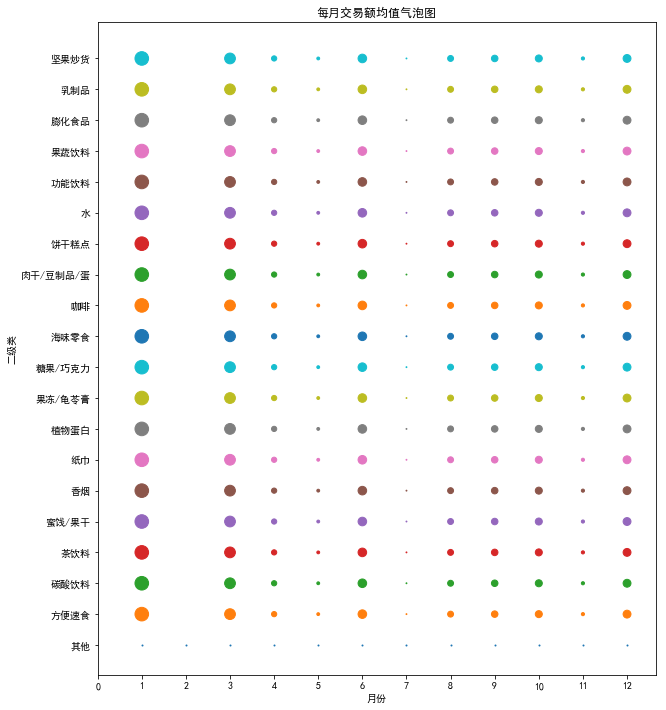

In [119]:
# 绘制气泡图
ax1 = plt.figure(figsize=(10,12))
for j in range(20):
    plt.scatter(range(1,13,1),[j+1]*12,s=a.iloc[:j] * 5)
plt.yticks(range(1,21,1),class_two)
plt.xticks(range(13))
plt.xlabel('月份')
plt.ylabel('二级类')
plt.title('每月交易额均值气泡图')
plt.savefig('每月交易额均值气泡图.png')
plt.show()

## 任务2.5
* 绘制售货机C 6/7/8三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位。从热力图可以分析得出哪些结论？

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 筛选出6,7,8月售货机C的数据命名为 data6
data = pd.read_csv('task1-1C.csv')
data.支付时间 = pd.to_datetime(data.支付时间)
June = data.loc[data.支付时间.dt.month == 6]
July = data.loc[data.支付时间.dt.month == 7]
Auguest = data.loc[data.支付时间.dt.month ==8]


* 六月销量热力图

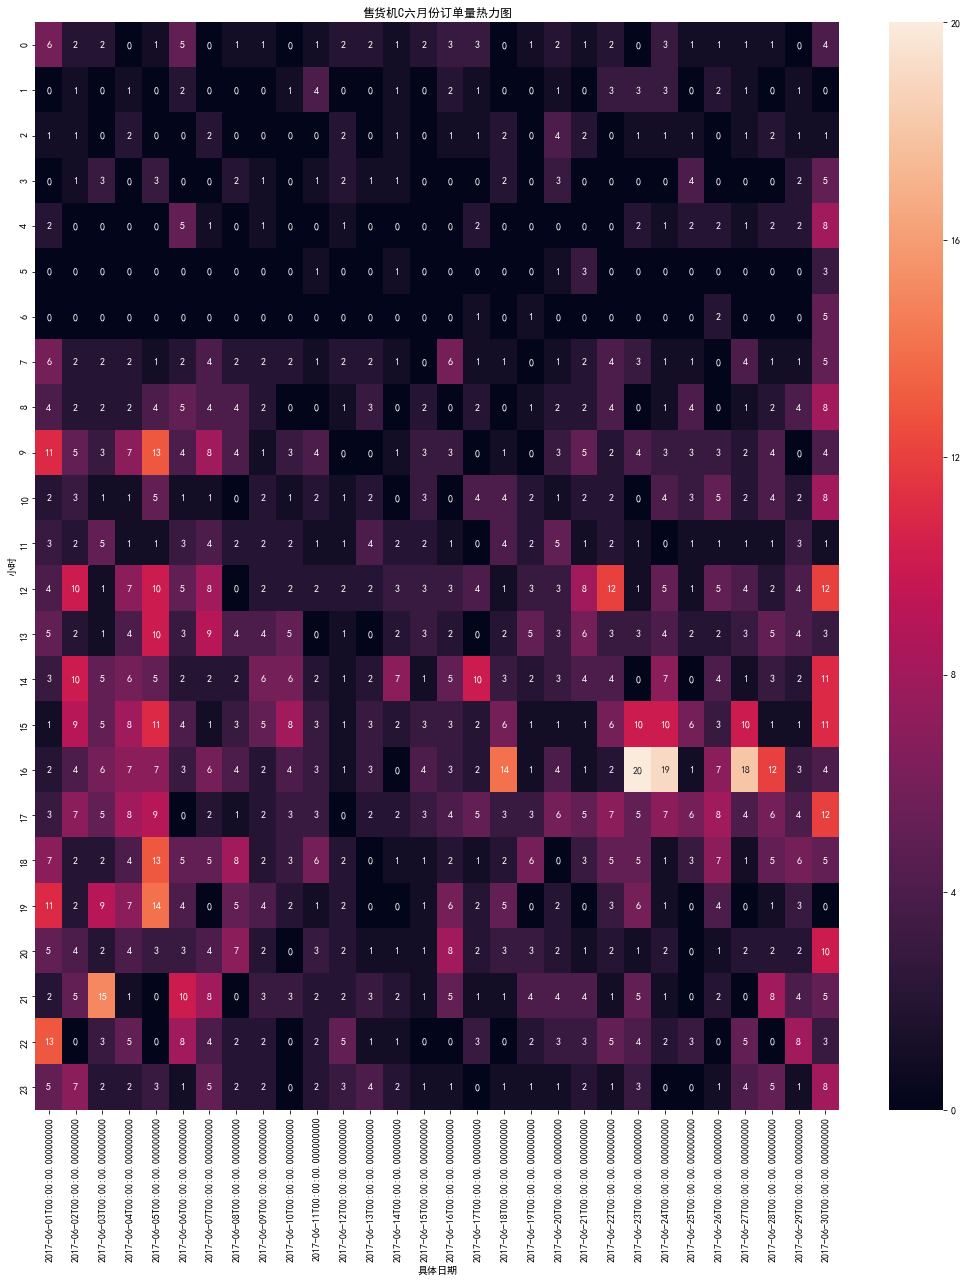

In [54]:
# 将6月每天内每个小时的销量进行统计，汇总到表格
Jun = pd.DataFrame([],index=range(24),columns=pd.date_range(start='2017-06-01',periods=30,freq='D'))
for i in range(24):
    for j in range(30):
        Jun.iloc[i,j] = June.loc[(June.支付时间.dt.day == j+1) & (June.支付时间.dt.hour == i)].shape[0]
plt.rcParams['font.sans-serif'] = 'SimHei'## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(18,20))
sns.heatmap(Jun,annot=True,linecolor='white')
plt.xlabel('具体日期')
plt.ylabel('小时')
plt.title('售货机C六月份订单量热力图')
plt.savefig('售货机C六月份订单量热力图.png')
plt.show()

* 七月份订单量热力图

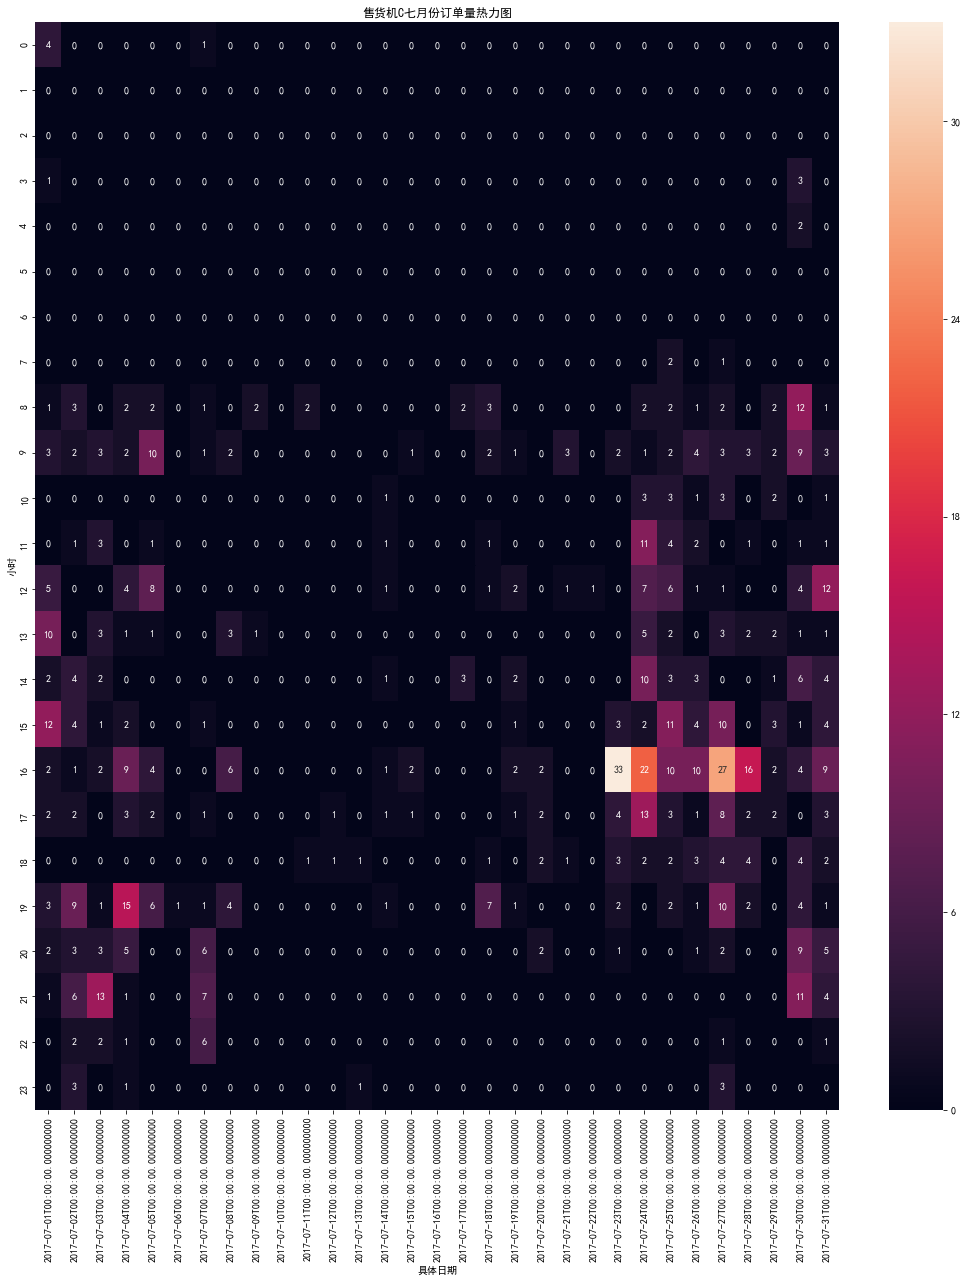

In [55]:
Ju = pd.DataFrame([],index=range(24),columns=pd.date_range(start='2017-07-01',periods=31,freq='D'))
for i in range(24):
    for j in range(31):
        Ju.iloc[i,j] = July.loc[(July.支付时间.dt.day == j+1) & (July.支付时间.dt.hour == i)].shape[0]

plt.figure(figsize=(18,20))
sns.heatmap(Ju,annot=True,linecolor='white')
plt.xlabel('具体日期')
plt.ylabel('小时')
plt.title('售货机C七月份订单量热力图')
plt.savefig('售货机C七月份订单量热力图.png')
plt.show()

* 八月份订单量热力图

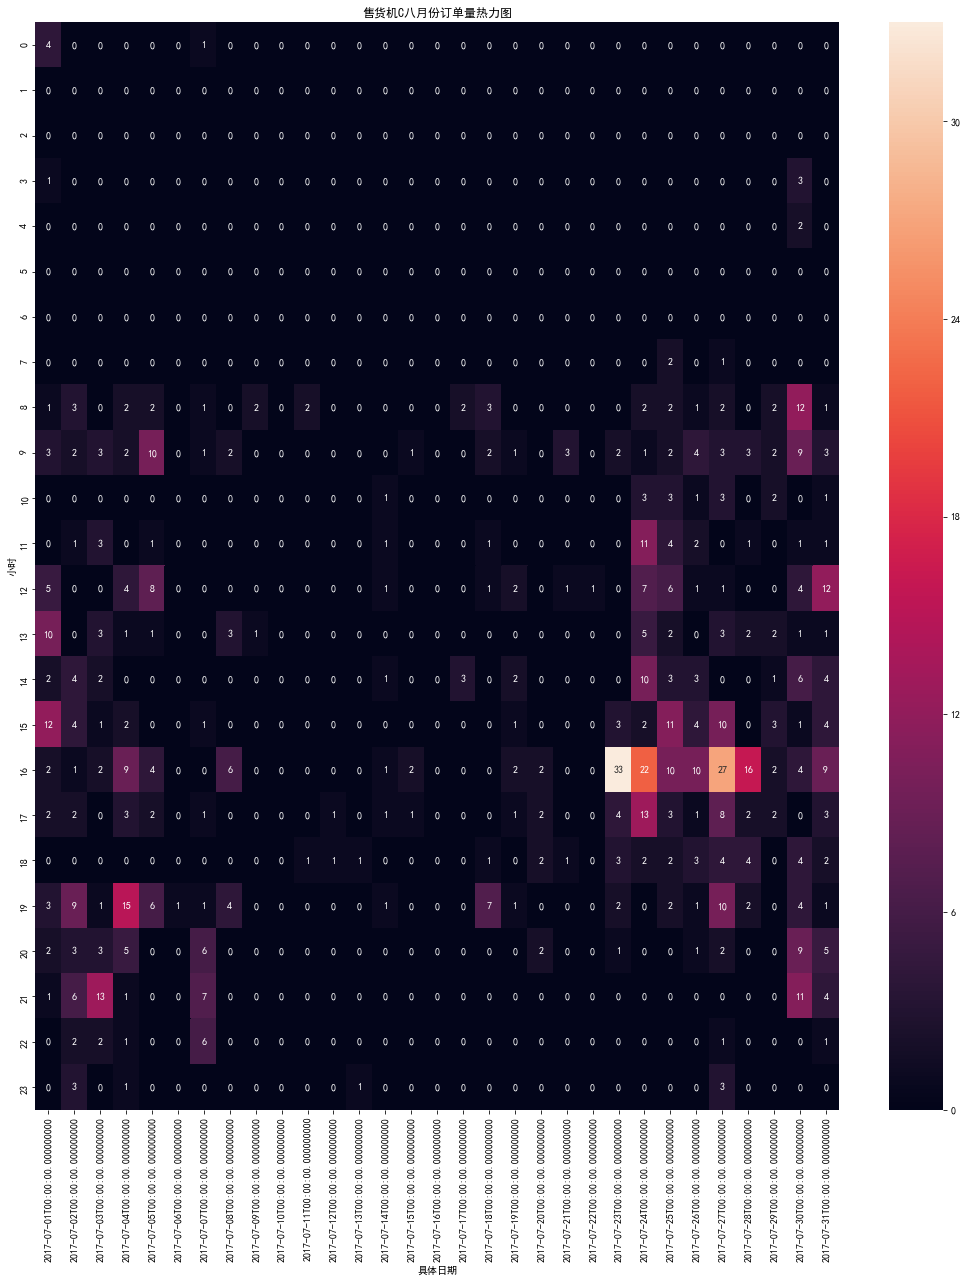

In [56]:
Aug = pd.DataFrame([],index=range(24),columns=pd.date_range(start='2017-08-01',periods=31,freq='D'))
for i in range(24):
    for j in range(31):
        Aug.iloc[i,j] = Auguest.loc[(Auguest.支付时间.dt.day == j+1) & (Auguest.支付时间.dt.hour == i)].shape[0]

plt.figure(figsize=(18,20))
sns.heatmap(Ju,annot=True,linecolor='white')
plt.xlabel('具体日期')
plt.ylabel('小时')
plt.title('售货机C八月份订单量热力图')
plt.savefig('售货机C八月份订单量热力图.png')
plt.show()

# 地区画像
## 任务3.1
分析各售货机商品销售数据，总结规律，给出每台售货机饮料类商品的标签，结果保存在CSV文件中，文件名分贝为"task3-1A.csv"、"task3-1B.csv"……"task3-1E.csv"

In [2]:
import pandas as pd

data2 = pd.read_csv('附件2.csv',engine='python')
drink = list(data2.loc[data2.大类=='饮料','商品'].values) # 获得饮料类商品名称
data2.head(3)

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点
2,10g卫龙亲嘴烧香辣味,非饮料,肉干/豆制品/蛋


In [3]:
dataA = pd.read_csv('task1-1A.csv')
dataA.head(3)

,Unnamed: 0,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
1,16,DD201708167493663388737478695,E43A6E078A04172,5.8,5.8,100g卫龙点心面黑椒牛排味,2017/1/1 19:29,A,已出货未退款,已提现
2,17,DD201708167493663381827746988,E43A6E078A04172,0.8,0.8,咪咪虾条马来西亚风味,2017/1/1 19:33,A,已出货未退款,已提现


In [4]:
save_volume = {}
for i in drink:
    save_volume[i] = dataA.loc[dataA.商品 == i].shape[0]

In [15]:
A = pd.Series(save_volume)
dictA = {'饮料类商品':A.index,'销量':A.values}
dfA = pd.DataFrame(dictA)
dfA.index = range(1,len(drink)+1,1)
dfA['标签'] = '正常'
dfA = dfA.sort_values('销量',ascending=False)
dfA.index = range(1,len(drink)+1,1)
dfA

,饮料类商品,销量,标签
1,怡宝纯净水,531,正常
2,东鹏特饮,448,正常
3,阿萨姆奶茶,326,正常
4,脉动,309,正常
5,营养快线,255,正常
6,统一冰红茶,228,正常
7,250ml维他柠檬茶,181,正常
8,250ml维他原味豆奶,176,正常
9,红牛,166,正常
10,统一绿茶,151,正常


In [23]:
a,b = dfA.销量.mean()-0.5*dfA.销量.std(), dfA.销量.mean()+0.5*dfA.销量.std()
for i in dfA.销量:
    if a <= i <= b:
        dfA.loc[dfA.销量 == i,'标签'] = '正常'
    elif i < a:
        dfA.loc[dfA.销量 == i,'标签'] = '滞销'
    elif i > b:
        dfA.loc[dfA.销量 == i,'标签'] = '畅销'
dfA

,饮料类商品,销量,标签
1,怡宝纯净水,531,畅销
2,东鹏特饮,448,畅销
3,阿萨姆奶茶,326,畅销
4,脉动,309,畅销
5,营养快线,255,畅销
6,统一冰红茶,228,畅销
7,250ml维他柠檬茶,181,畅销
8,250ml维他原味豆奶,176,畅销
9,红牛,166,畅销
10,统一绿茶,151,畅销


In [24]:
dfA.to_csv('task3-1A.csv')

In [25]:
# 生成task3-1B.csv
dataB = pd.read_csv('task1-1B.csv')
save_volume = {}
for i in drink:
    save_volume[i] = dataB.loc[dataB.商品 == i].shape[0]
B = pd.Series(save_volume)
dictB = {'饮料类商品':B.index,'销量':B.values}
dfB = pd.DataFrame(dictB)
dfB.index = range(1,len(drink)+1,1)
dfB['标签'] = '正常'
dfB = dfA.sort_values('销量',ascending=False)
dfB.index = range(1,len(drink)+1,1)

a,b = dfB.销量.mean()-0.5*dfB.销量.std(), dfB.销量.mean()+0.5*dfB.销量.std()
for i in dfB.销量:
    if a <= i <= b:
        dfB.loc[dfB.销量 == i,'标签'] = '正常'
    elif i < a:
        dfB.loc[dfB.销量 == i,'标签'] = '滞销'
    elif i > b:
        dfB.loc[dfB.销量 == i,'标签'] = '畅销'
dfB.to_csv('task3-1B.csv')

生成task3-1C.csv

In [26]:
dataC = pd.read_csv('task1-1C.csv')
save_volume = {}
for i in drink:
    save_volume[i] = dataC.loc[dataC.商品 == i].shape[0]
C = pd.Series(save_volume)
dictC = {'饮料类商品':C.index,'销量':C.values}
dfC = pd.DataFrame(dictC)
dfC.index = range(1,len(drink)+1,1)
dfC['标签'] = '正常'
dfC = dfC.sort_values('销量',ascending=False)
dfC.index = range(1,len(drink)+1,1)

a,b = dfC.销量.mean()-0.5*dfC.销量.std(), dfC.销量.mean()+0.5*dfC.销量.std()
for i in dfC.销量:
    if a <= i <= b:
        dfC.loc[dfC.销量 == i,'标签'] = '正常'
    elif i < a:
        dfC.loc[dfC.销量 == i,'标签'] = '滞销'
    elif i > b:
        dfC.loc[dfC.销量 == i,'标签'] = '畅销'
dfB.to_csv('task3-1C.csv')

生成task3-1D.csv

In [27]:
dataD = pd.read_csv('task1-1D.csv')
save_volume = {}
for i in drink:
    save_volume[i] = dataD.loc[dataD.商品 == i].shape[0]
D = pd.Series(save_volume)
dictD = {'饮料类商品':D.index,'销量':D.values}
dfD = pd.DataFrame(dictD)
dfD.index = range(1,len(drink)+1,1)
dfD['标签'] = '正常'
dfD = dfD.sort_values('销量',ascending=False)
dfD.index = range(1,len(drink)+1,1)

a,b = dfD.销量.mean()-0.5*dfD.销量.std(), dfD.销量.mean()+0.5*dfD.销量.std()
for i in dfD.销量:
    if a <= i <= b:
        dfD.loc[dfD.销量 == i,'标签'] = '正常'
    elif i < a:
        dfD.loc[dfD.销量 == i,'标签'] = '滞销'
    elif i > b:
        dfD.loc[dfD.销量 == i,'标签'] = '畅销'
dfD.to_csv('task3-1D.csv')

生成task3-1D.csv

In [28]:
dataE = pd.read_csv('task1-1E.csv')
save_volume = {}
for i in drink:
    save_volume[i] = dataE.loc[dataE.商品 == i].shape[0]
E = pd.Series(save_volume)
dictE = {'饮料类商品':E.index,'销量':E.values}
dfE = pd.DataFrame(dictE)
dfE.index = range(1,len(drink)+1,1)
dfE['标签'] = '正常'
dfE = dfE.sort_values('销量',ascending=False)
dfE.index = range(1,len(drink)+1,1)

a,b = dfE.销量.mean()-0.5*dfE.销量.std(), dfE.销量.mean()+0.5*dfE.销量.std()
for i in dfE.销量:
    if a <= i <= b:
        dfE.loc[dfE.销量 == i,'标签'] = '正常'
    elif i < a:
        dfE.loc[dfE.销量 == i,'标签'] = '滞销'
    elif i > b:
        dfE.loc[dfE.销量 == i,'标签'] = '畅销'
dfE.to_csv('task3-1E.csv')

## 任务3.2
在任务3.1的基础上进行标签拓展，依据标签生成完整的售货机画像，结果保存为csv文件，文件名分别为“task3-2A.csv”、“task3-2B.csv”…“task3-2E.csv”。依据此画像进行总结描述，给出营销意见。

In [57]:
import wordcloud
from scipy.misc import imread
dfA.loc[dfA.标签 == '畅销'].head(3)

,饮料类商品,销量,标签
1,怡宝纯净水,531,畅销
2,东鹏特饮,448,畅销
3,阿萨姆奶茶,326,畅销


In [69]:
mk = imread('yuantu1.png')
tags = list(dfA.loc[dfA.标签 == '畅销','饮料类商品'].values)
pd.Series(tags).to_csv('task3-2A.csv')
tag = []
for i in tags:
    for j in range(int(dfA.loc[dfA.饮料类商品 == i,'销量'].values)):
        tag.append(i)
a = wordcloud.WordCloud(width=1000,\
                        height=800,\
                        background_color='white',\
                        font_path = "msyh.ttc",\
                       mask = mk)
a.generate(' '.join(tag))
a.to_file('A售货机热销商品词云图.png')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


B售货机热销商品词云图及标签画像

In [70]:
mk = imread('yuantu1.png')
tags = list(dfB.loc[dfB.标签 == '畅销','饮料类商品'].values)
pd.Series(tags).to_csv('task3-2B.csv')
tag = []
for i in tags:
    for j in range(int(dfB.loc[dfB.饮料类商品 == i,'销量'].values)):
        tag.append(i)
a = wordcloud.WordCloud(width=1000,\
                        height=800,\
                        background_color='white',\
                        font_path = "msyh.ttc",\
                       mask = mk)
a.generate(' '.join(tag))
a.to_file('B售货机热销商品词云图.png')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


C售货机热销商品词云图及标签画像

In [71]:
mk = imread('yuantu1.png')
tags = list(dfC.loc[dfC.标签 == '畅销','饮料类商品'].values)
pd.Series(tags).to_csv('task3-2C.csv')
tag = []
for i in tags:
    for j in range(int(dfB.loc[dfC.饮料类商品 == i,'销量'].values)):
        tag.append(i)
a = wordcloud.WordCloud(width=1000,\
                        height=800,\
                        background_color='white',\
                        font_path = "msyh.ttc",\
                       mask = mk)
a.generate(' '.join(tag))
a.to_file('C售货机热销商品词云图.png')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


D售货机热销商品词云图及标签画像

In [72]:
mk = imread('yuantu1.png')
tags = list(dfD.loc[dfD.标签 == '畅销','饮料类商品'].values)
pd.Series(tags).to_csv('task3-2D.csv')
tag = []
for i in tags:
    for j in range(int(dfD.loc[dfD.饮料类商品 == i,'销量'].values)):
        tag.append(i)
a = wordcloud.WordCloud(width=1000,\
                        height=800,\
                        background_color='white',\
                        font_path = "msyh.ttc",\
                       mask = mk)
a.generate(' '.join(tag))
a.to_file('D售货机热销商品词云图.png')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


E售货机热销商品词云图及标签画像

In [73]:
mk = imread('yuantu1.png')
tags = list(dfE.loc[dfE.标签 == '畅销','饮料类商品'].values)
pd.Series(tags).to_csv('task3-2E.csv')
tag = []
for i in tags:
    for j in range(int(dfE.loc[dfE.饮料类商品 == i,'销量'].values)):
        tag.append(i)
a = wordcloud.WordCloud(width=1000,\
                        height=800,\
                        background_color='white',\
                        font_path = "msyh.ttc",\
                       mask = mk)
a.generate(' '.join(tag))
a.to_file('E售货机热销商品词云图.png')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


# 业务预测

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv('附件2.csv',engine='python')

In [2]:
drinks = list(data2.loc[data2.大类 == '饮料','商品'].values)
non_beverage = list(data2.loc[data2.大类 == '非饮料','商品'].values)

In [3]:
def saves_data(df):
    df['大类'] = '未知种类'
    for i in drinks:
        df.loc[df.商品 == i,'大类'] = '饮料'
    for j in non_beverage:
        df.loc[df.商品 == j,'大类'] = '非饮料'
        df.支付时间 = pd.to_datetime(df.支付时间)
    saves_volume = {}
    for i in range(1,13,1):
        saves_volume[i] = []
        saves_volume[i].append(df.loc[(df.大类=='饮料') & (df.支付时间.dt.month==i),'实际金额'].sum())
        saves_volume[i].append(df.loc[(df.大类=='非饮料') & (df.支付时间.dt.month==i),'实际金额'].sum())
    B = pd.DataFrame(saves_volume,index=['饮料','非饮料'])
    B.index.name = '售货机每月销售额'
    B.columns.name = '月份'
    return B

A售货机每月各大类销售额

In [4]:
dfA = pd.read_csv('task1-1A.csv')
A = saves_data(dfA)
A.index.name = 'A售货机每月销售额'
A

月份,1,2,3,4,5,6,7,8,9,10,11,12
A售货机每月销售额,,,,,,,,,,,,
饮料,717.3,313.5,557.6,940.3,1353.2,3748.8,1106.8,1586.5,2782.7,3345.0,3104.8,4424.8
非饮料,792.4,127.0,356.7,864.2,2031.9,3006.3,843.7,650.4,1696.8,2947.4,2082.2,3162.3


B售货机每月各大类销售额

In [5]:
dfB = pd.read_csv('task1-1B.csv')
B = saves_data(dfB)
B.index.name = 'B售货机每月销售额'
B

月份,1,2,3,4,5,6,7,8,9,10,11,12
B售货机每月销售额,,,,,,,,,,,,
饮料,870.3,506.5,688.0,1601.7,1950.6,4491.1,850.4,2716.1,4535.8,5567.4,5371.8,5845.5
非饮料,503.3,95.8,269.9,855.7,1730.6,3059.2,668.2,800.0,2671.5,2764.2,3298.1,2258.6


C售货机每月各大类销售额

In [6]:
dfC = pd.read_csv('task1-1C.csv')
C = saves_data(dfC)
C.index.name = 'C售货机每月销售额'
C

月份,1,2,3,4,5,6,7,8,9,10,11,12
C售货机每月销售额,,,,,,,,,,,,
饮料,919.6,624.0,780.7,2137.2,1709.0,4783.6,1849.7,3901.7,4653.9,6121.5,5465.9,6608.1
非饮料,720.9,168.0,210.8,1095.1,2020.4,3688.6,1197.4,1025.5,2775.1,3348.2,2990.8,2772.4


D售货机每月各大类销售额

In [7]:
dfD = pd.read_csv('task1-1D.csv')
D = saves_data(dfD)
D.index.name = 'D售货机每月销售额'
D

月份,1,2,3,4,5,6,7,8,9,10,11,12
D售货机每月销售额,,,,,,,,,,,,
饮料,479.8,361.0,503.5,1048.0,1066.8,2100.3,770.8,1854.6,2748.9,2859.2,3333.3,3967.4
非饮料,476.6,74.5,323.2,631.1,1325.3,2086.7,570.0,516.7,1084.2,1747.5,1340.1,1973.8


E售货机每月各大类销售额

In [8]:
dfE = pd.read_csv('task1-1E.csv')
E = saves_data(dfE)
E.index.name = 'E售货机每月销售额'
E

月份,1,2,3,4,5,6,7,8,9,10,11,12
E售货机每月销售额,,,,,,,,,,,,
饮料,1201.1,742.3,1107.5,2349.5,3197.2,5873.3,2004.6,5276.0,11803.0,6681.7,14650.5,9316.3
非饮料,455.7,196.4,399.5,1373.6,2501.8,4026.4,1181.8,1446.5,5251.3,3526.9,6851.3,4241.2


In [9]:
def GM11(x0): #自定义灰色预测函数
  import numpy as np
  x1 = x0.cumsum() #1-AGO序列
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

A售货机2018年1月的预测销售额

In [28]:
f = GM11(A.iloc[0,:].as_matrix())[0]
a = f(13)
ff = GM11(A.iloc[1,:].as_matrix())[0]
b = ff(13)
print('A售货机饮料类预测2018年1月的销售额为：{:.2f}\nA售货机非饮料预测2018年1月的销售额为：{:.2f}'.format(a,b))

A售货机饮料类预测2018年1月的销售额为：5162.62
A售货机非饮料预测2018年1月的销售额为：3439.42


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


B售货机2018年1月的预测销售额

In [29]:
f = GM11(B.iloc[0,:].as_matrix())[0]
a = f(13)
ff = GM11(B.iloc[1,:].as_matrix())[0]
b = ff(13)
print('B售货机饮料类预测2018年1月的销售额为：{:.2f}\nB售货机非饮料预测2018年1月的销售额为：{:.2f}'.format(a,b))

B售货机饮料类预测2018年1月的销售额为：8094.88
B售货机非饮料预测2018年1月的销售额为：3689.71


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


C售货机2018年1月的预测销售额

In [30]:
f = GM11(C.iloc[0,:].as_matrix())[0]
a = f(13)
ff = GM11(C.iloc[1,:].as_matrix())[0]
b = ff(13)
print('C售货机饮料类预测2018年1月的销售额为：{:.2f}\nC售货机非饮料预测2018年1月的销售额为：{:.2f}'.format(a,b))

C售货机饮料类预测2018年1月的销售额为：8703.71
C售货机非饮料预测2018年1月的销售额为：3921.16


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


D售货机2018年1月的预测销售额

In [31]:
f = GM11(D.iloc[0,:].as_matrix())[0]
a = f(13)
ff = GM11(D.iloc[1,:].as_matrix())[0]
b = ff(13)
print('D售货机饮料类预测2018年1月的销售额为：{:.2f}\nD售货机非饮料预测2018年1月的销售额为：{:.2f}'.format(a,b))

D售货机饮料类预测2018年1月的销售额为：5082.21
D售货机非饮料预测2018年1月的销售额为：2074.70


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


E售货机2018年1月的预测销售额

In [32]:
f = GM11(E.iloc[0,:].as_matrix())[0]
a = f(13)
ff = GM11(E.iloc[1,:].as_matrix())[0]
b = ff(13)
print('E售货机饮料类预测2018年1月的销售额为：{:.2f}\nE售货机非饮料预测2018年1月的销售额为：{:.2f}'.format(a,b))

E售货机饮料类预测2018年1月的销售额为：17192.91
E售货机非饮料预测2018年1月的销售额为：7310.58


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
